# Frekvencijske karakteristike sistema

Jedan od načina zadavanja digitalnih sistema, odnosno, filtara u Python-u je pomoću njihove funkcije prenosa. Poznato je da funkcija prenosa linearnih vremenski nepromjenljivih sistema ima oblik racionalne funkcije. Dakle, moguće je memorisati dva polinoma, b i a, koji predstavljaju brojnik i nazivnik funkcije prenosa. Za određivanje frekvencijske karakteristike filtra koristi se funkcija <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html">freqz</a>.

## Zadaci

1. Dat je linearan vremenski nepromjenljiv sistem opisan jednačinom diferencija
$$
y(n)-\frac{1}{2}y(n-1) = x(n)
$$
Nacrtati amplitudnu i faznu karakteristiku ovog sistema.

<IPython.core.display.Javascript object>


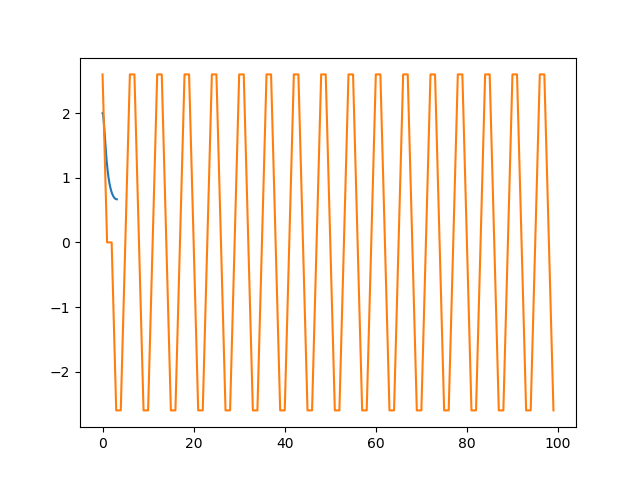

<IPython.core.display.Javascript object>


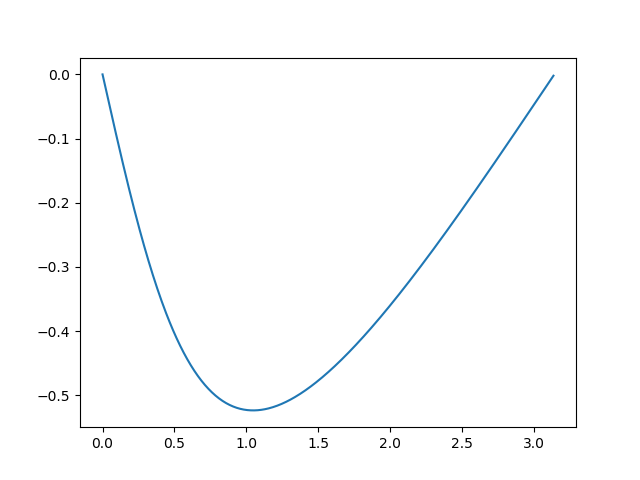

In [1]:
### KOD
%matplotlib notebook
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as pyplot

b = np.array([1])
a = np.array([1, -1/2])
(w, h) = signal.freqz(b, a, 512, False)

pyplot.figure()
pyplot.plot(w, np.abs(h))
pyplot.figure()
pyplot.plot(w, np.angle(h))

2. Generisati i nacrtati realni i imaginarni dio odziva na signal $x(n) = e^{-jn \pi / 2}u(n)$. Prikazati dovoljno dugo trajanje odziva tako da prelazni režim nestane. Odredite vrijednost kompleksne amplitude izlaznog signala za $n \rightarrow \infty$.

<IPython.core.display.Javascript object>


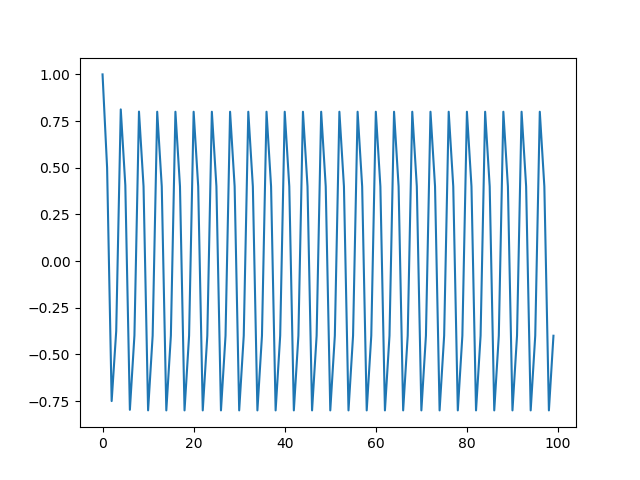

<IPython.core.display.Javascript object>


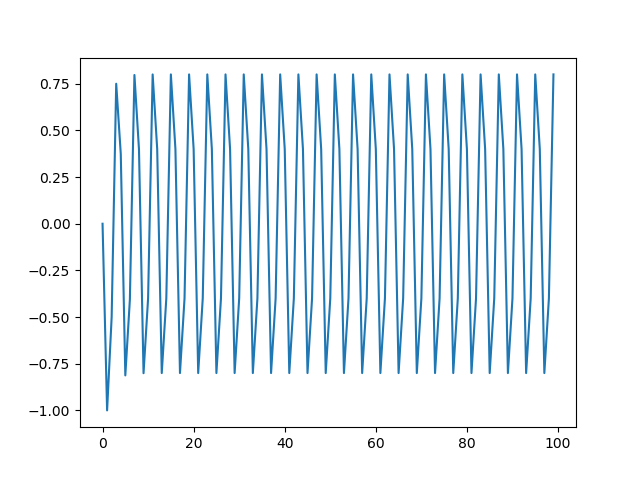

[-0.4+0.8j  0.8+0.4j  0.4-0.8j -0.8-0.4j -0.4+0.8j]


In [47]:
###KOD
n = np.arange(0, 100)
x = np.e ** (-n * (np.pi/2)*1j)
y = signal.lfilter(b, a, x)
pyplot.figure()
pyplot.plot(n, np.real(y))
pyplot.figure()
pyplot.plot(n, np.imag(y))

3. Generisati i nacrtati realni i imaginarni dio odziva na signal $x(n) = e^{-jn\pi}u(n)$. Prikazati dovoljno dugo trajanje odziva tako da prelazni režim nestane. Odredite vrijednost kompleksne amplitude izlaznog signala za $n \rightarrow \infty$.

<IPython.core.display.Javascript object>


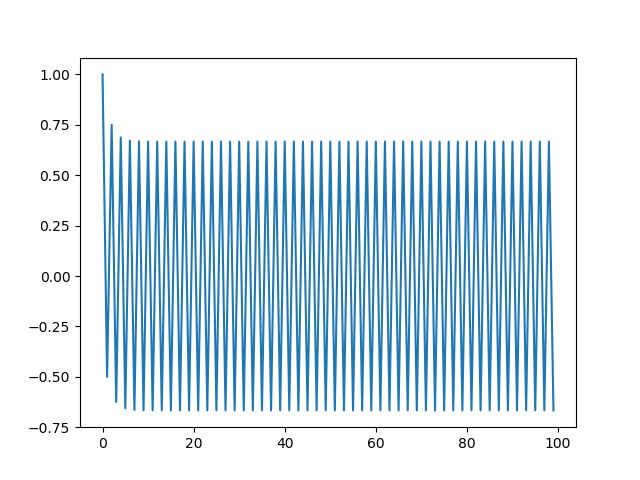

<IPython.core.display.Javascript object>


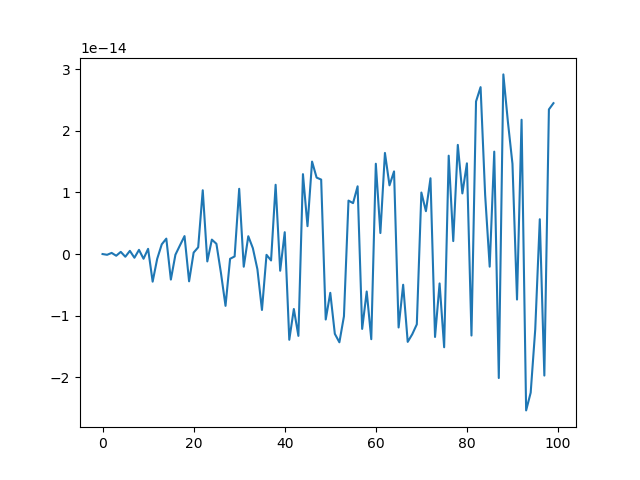

In [45]:
###KOD
n = np.arange(0, 100)
x = np.e ** (-n * np.pi* 1j)
y = signal.lfilter(b, a, x)
pyplot.figure()
pyplot.plot(n, np.real(y))
pyplot.figure()
pyplot.plot(n, np.imag(y))

4. Generisati i nacrtati odziv na signal $x(n) = 10 - 5 sin(\frac{\pi}{2} n) +20 cos(\pi n)$. Prikazati dovoljno dugo trajanje odziva tako da prelazni režim nestane. Odrediti vrijednost amplitude izlaznog signala za $n \rightarrow \infty$.

<IPython.core.display.Javascript object>


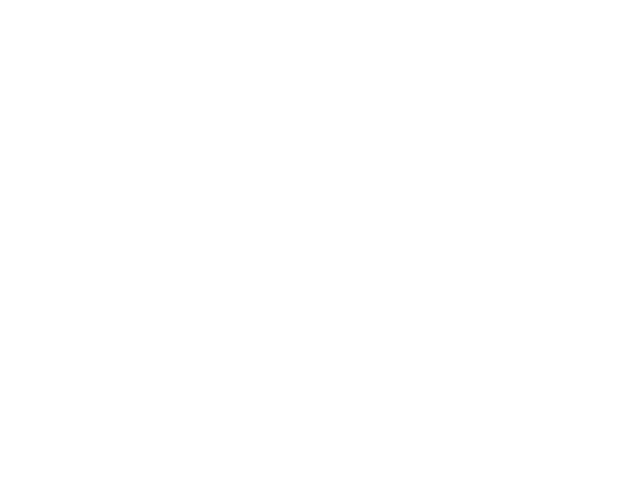

<IPython.core.display.Javascript object>


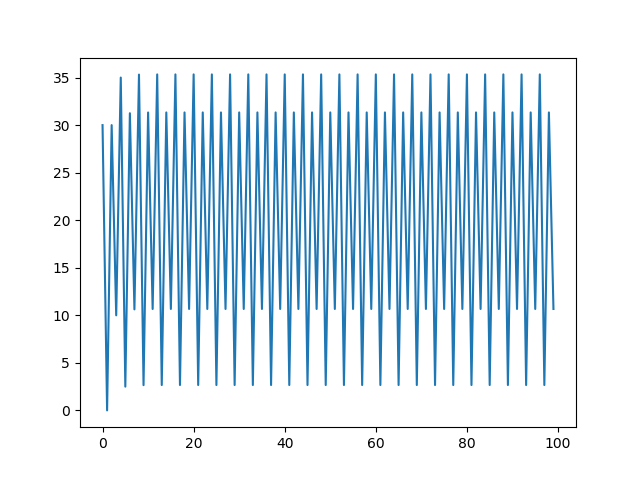

In [36]:
n = np.arange(0, 100)
x = 10 - 5*np.sin(n * np.pi/2) + 20*np.cos(np.pi * n)
y = signal.lfilter(b, a, x)
pyplot.figure()
pyplot.figure()
pyplot.plot(n, y)

5. Dat je digitalni filtar prikazan blok šemom
<img src="images/lab1.png" />
Nacrtati amplitudnu i faznu karakteristiku filtra za vrijednosti $\omega_0$ od $0, \pi/4, \pi/3, \pi/2, \pi$? Komentarisati. Kakvi tipovi filtara se dobijaju?

<IPython.core.display.Javascript object>


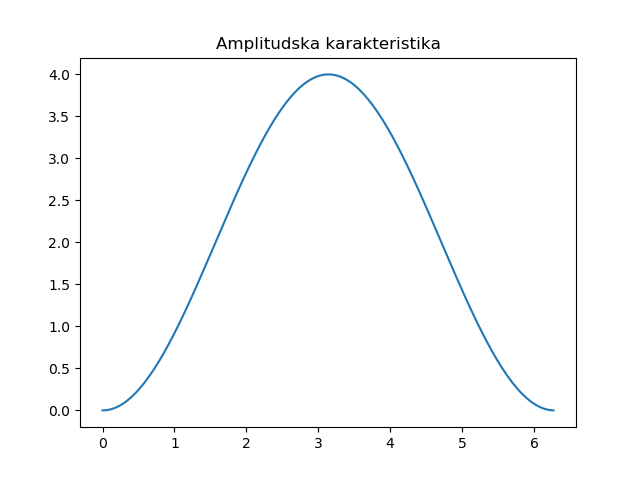

<IPython.core.display.Javascript object>


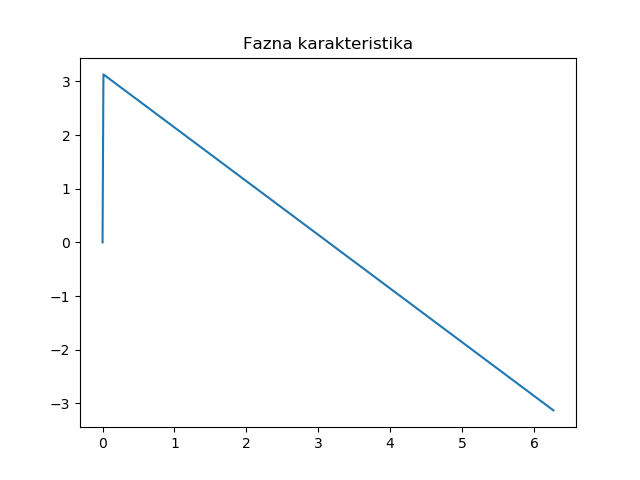

<IPython.core.display.Javascript object>


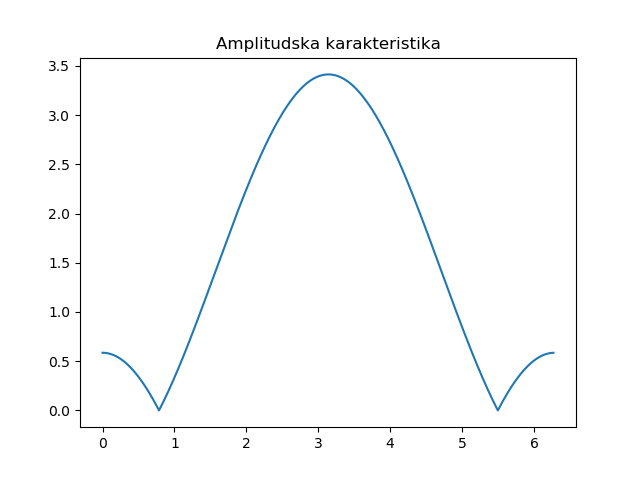

<IPython.core.display.Javascript object>


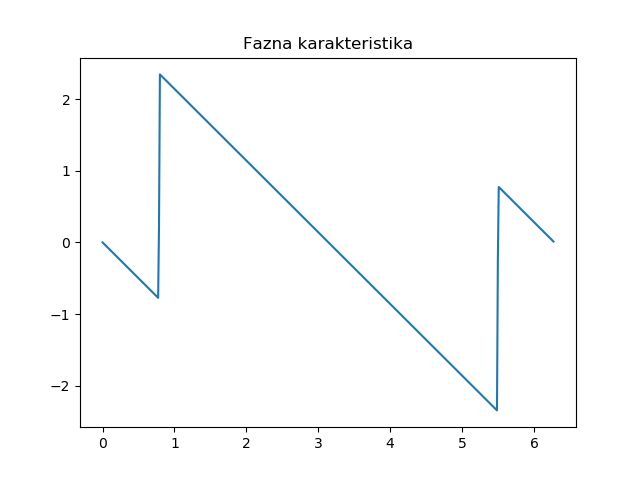

<IPython.core.display.Javascript object>


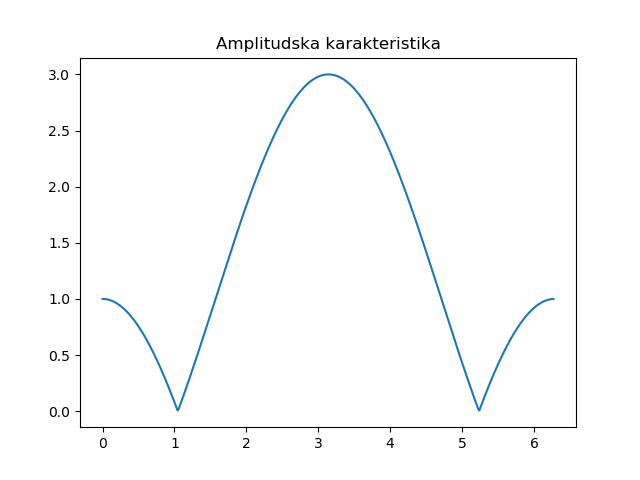

<IPython.core.display.Javascript object>


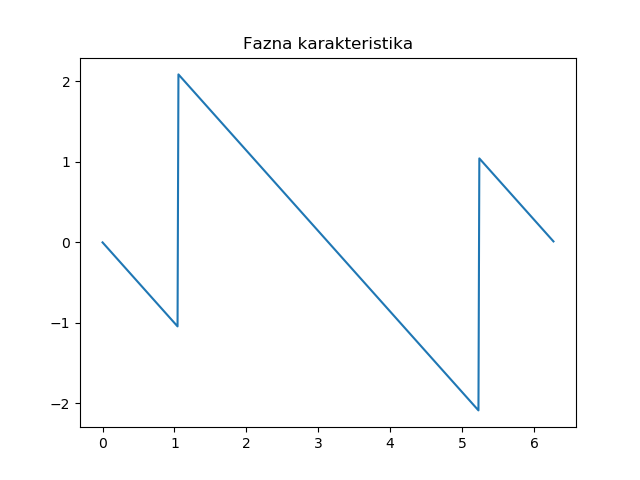

<IPython.core.display.Javascript object>


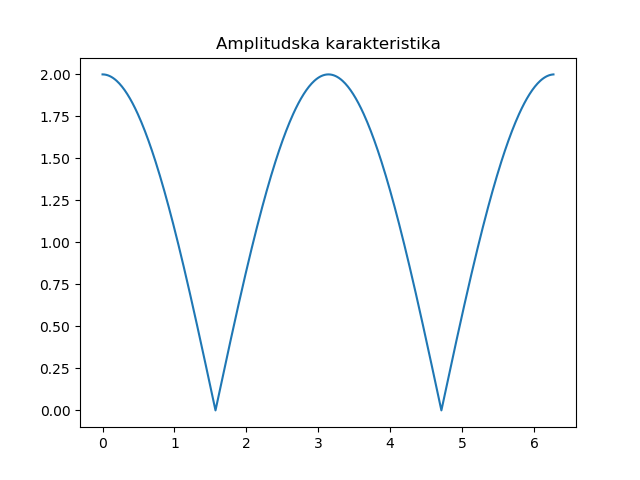

<IPython.core.display.Javascript object>


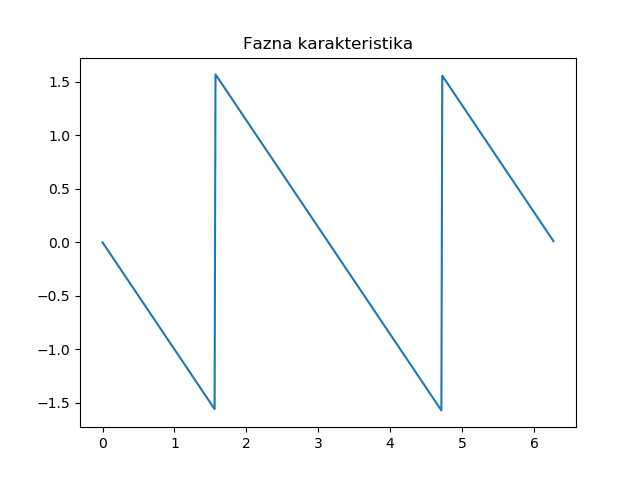

<IPython.core.display.Javascript object>


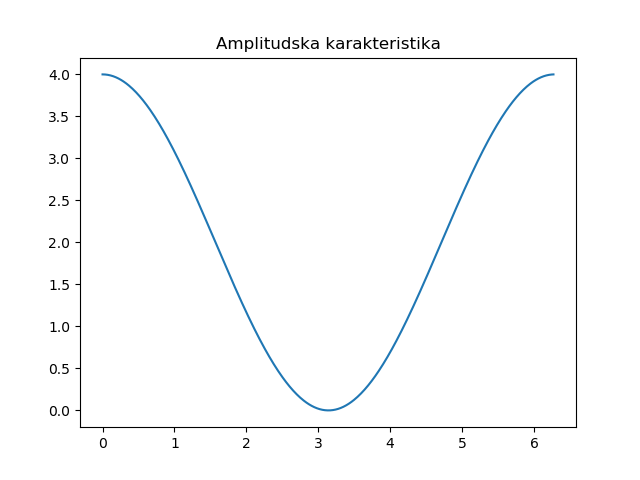

<IPython.core.display.Javascript object>


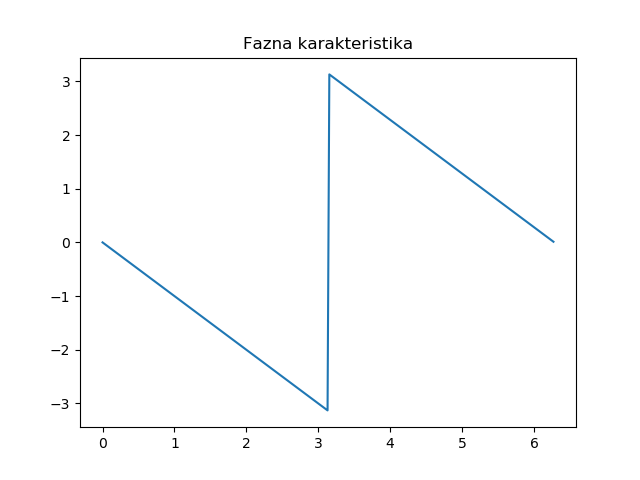

In [50]:
def ampPhase(w0):
    b = np.array([1, -2 * np.cos(w0), 1])
    (w, h) = signal.freqz(b, 1, 512, True)
    pyplot.figure()
    pyplot.title("Amplitudska karakteristika")
    pyplot.plot(w, np.abs(h))
    pyplot.figure()
    pyplot.title("Fazna karakteristika")
    pyplot.plot(w, np.unwrap(np.angle(h)))

ampPhase(0)
ampPhase(np.pi / 4)
ampPhase(np.pi / 3)
ampPhase(np.pi / 2)
ampPhase(np.pi)

6. Za $\omega_{0} = \pi/2$ geneisati i nacrtati odziv na signal $x(n) = 3cos\left(\frac{\pi}{3}n+\frac{\pi}{6}\right)$.Prikazati dovoljno dugo trajanje odziva tako da prelazni režim nestane. Odrediti vrijednost amplitude izlaznog signala za $n \rightarrow \infty$.

<IPython.core.display.Javascript object>


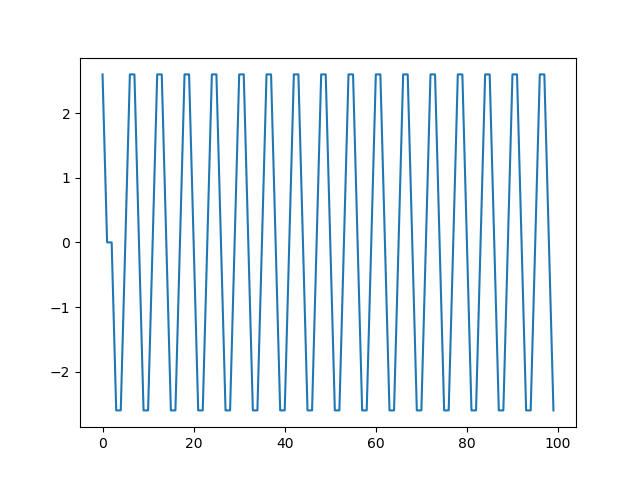

In [3]:
###KOD
w0 = np.pi / 2
n = np.arange(0, 100)
x = 3 * np.cos((np.pi / 3) * n + np.pi / 6)
b = np.array([1, -2 * np.cos(w0), 1])
a = 1
y = signal.lfilter(b, a, x)
pyplot.figure()
pyplot.plot(n, y)

7. Učitati u radni prostor fajl <i>sm.wav</i> i reprodukovati ga.

In [46]:
###KOD
import scipy.io.wavfile as wavfile
import sounddevice as sd
sampleRate, data = wavfile.read("sm.wav")
dataFloat = data / np.amax(np.abs(data))
sd.play(dataFloat, sampleRate)
FS = sampleRate

8. Ukoliko smo zainteresovani samo za izdvajanje dijela signala koji sadrži bas onda je to moguće uraditi korištenjem niskopropusnog filtra. Koeficijenti niskopropusnog filtra granične frekvencije 200Hz su definisani u narednoj ćeliji. Korištenjem datih koeficijenata nacrtati amplitudsku i faznu karakteristiku filtra, a zatim filtrirati zvučni signal iz prethodne tačke i reprodukovati rezultat.

In [48]:
fc = 200.0
wc = fc / (FS/2)  #Promjenljiva FS treba da sadrži frekvenciju odmjeravanja ulaznog signala
b, a = signal.butter(6, wc)

<IPython.core.display.Javascript object>


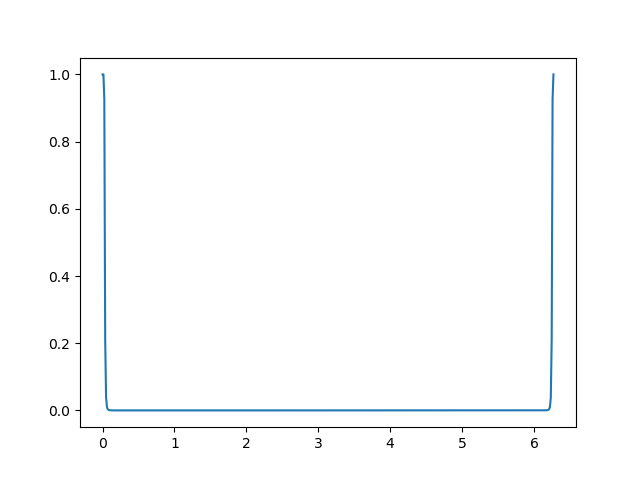

<IPython.core.display.Javascript object>


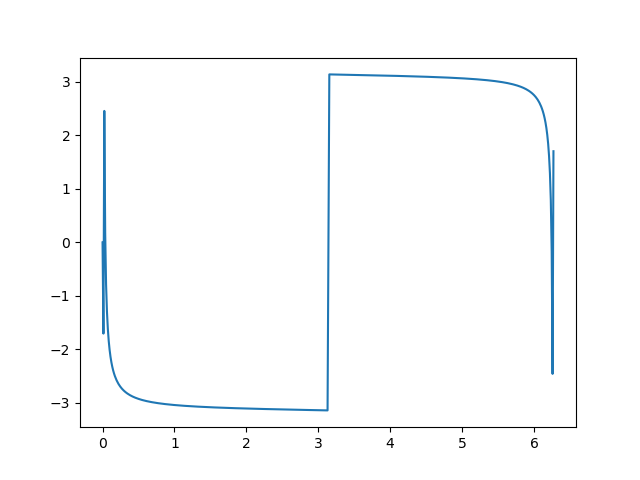

In [49]:
###KOD
y = signal.lfilter(b, a, dataFloat)
sd.play(y, sampleRate)
w, H = signal.freqz(b, a, 512, True)
pyplot.figure()
pyplot.plot(w, np.abs(H))
pyplot.figure()
pyplot.plot(w, np.angle(H))

9. Za razultat dobijen u prethodnoj tački korišten je IIR filtar. U narednoj ćeliji su definisani koeficijenti FIR niskopropusnog filtra. Korištenjem datih koeficijenata nacrtati amplitudsku i faznu karakteristiku filtra, a zatim filtrirati zvučni signal iz tačke 8. i reprodukovati rezultat.

In [55]:
tb = 100
M = 1200
h = signal.remez(M, [0, fc, fc+tb, FS/2], [1, 0], [1, 1], Hz=FS, maxiter=50)

def plot_dtft(x, fs):
    '''Crta amplitudni spektar signala signala x.
       Frekvencijska osa je u Hercima za frekvenciju odmjeravanja fs.
    '''
    
    from scipy.fftpack import rfft, rfftfreq
    
    L = np.int(2**np.ceil(np.log2(len(x))))
    X = rfft(x, L)
    X /= L
    F = rfftfreq(L, 1/fs)
    
    pyplot.figure()
    pyplot.plot(F, 20*np.log10(np.abs(X)))
    pyplot.xlabel('F [Hz]')
    pyplot.ylabel('|X(F)| [dB]')

<IPython.core.display.Javascript object>


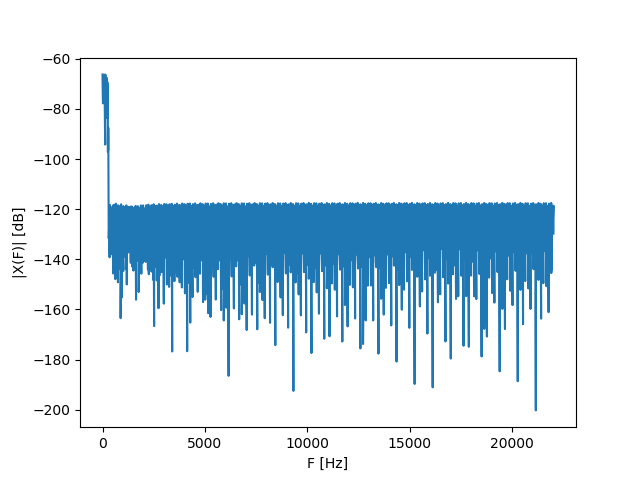

C:\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [56]:
###KOD
y = signal.convolve(dataFloat, h)
sd.play(y, FS)
plot_dtft(h, FS)

10. U narednoj ćeliji su dati koeficijenti FIR visokopropusnog filtra granične frekvencije 4kHz. Korištenjem datih koeficijenata nacrtati amplitudsku i faznu karakteristiku filtra, a zatim filtrirati zvučni signal iz tačke 8. i reprodukovati rezultat.

In [ ]:
fh = 4000
M = 1601
hh = signal.remez(M, [0, fh - tb, fh, SF/2], [0, 1], [10, 1], Hz=FS, maxiter=50)

In [ ]:
###KOD